# Лабораторная работа 1.2. Линейная регрессия

Библиотеки

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn import datasets

Загрузка данных

In [4]:
diabetes = datasets.load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data['progression'] = diabetes.target

Первые 5 строк

In [5]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Здесь единственный очевидный категориальный признак - это sex, целевой - progression, а остальные все - вещественные признаки (сложно сказать насчёт s4, является ли он категориальным или нет)

In [6]:
categorial_features = ['sex']
real_features = ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
target_feature = ['progression']

Делим данные на обучающие и тестовые

In [7]:
train, test = train_test_split(data, test_size=0.2)

График

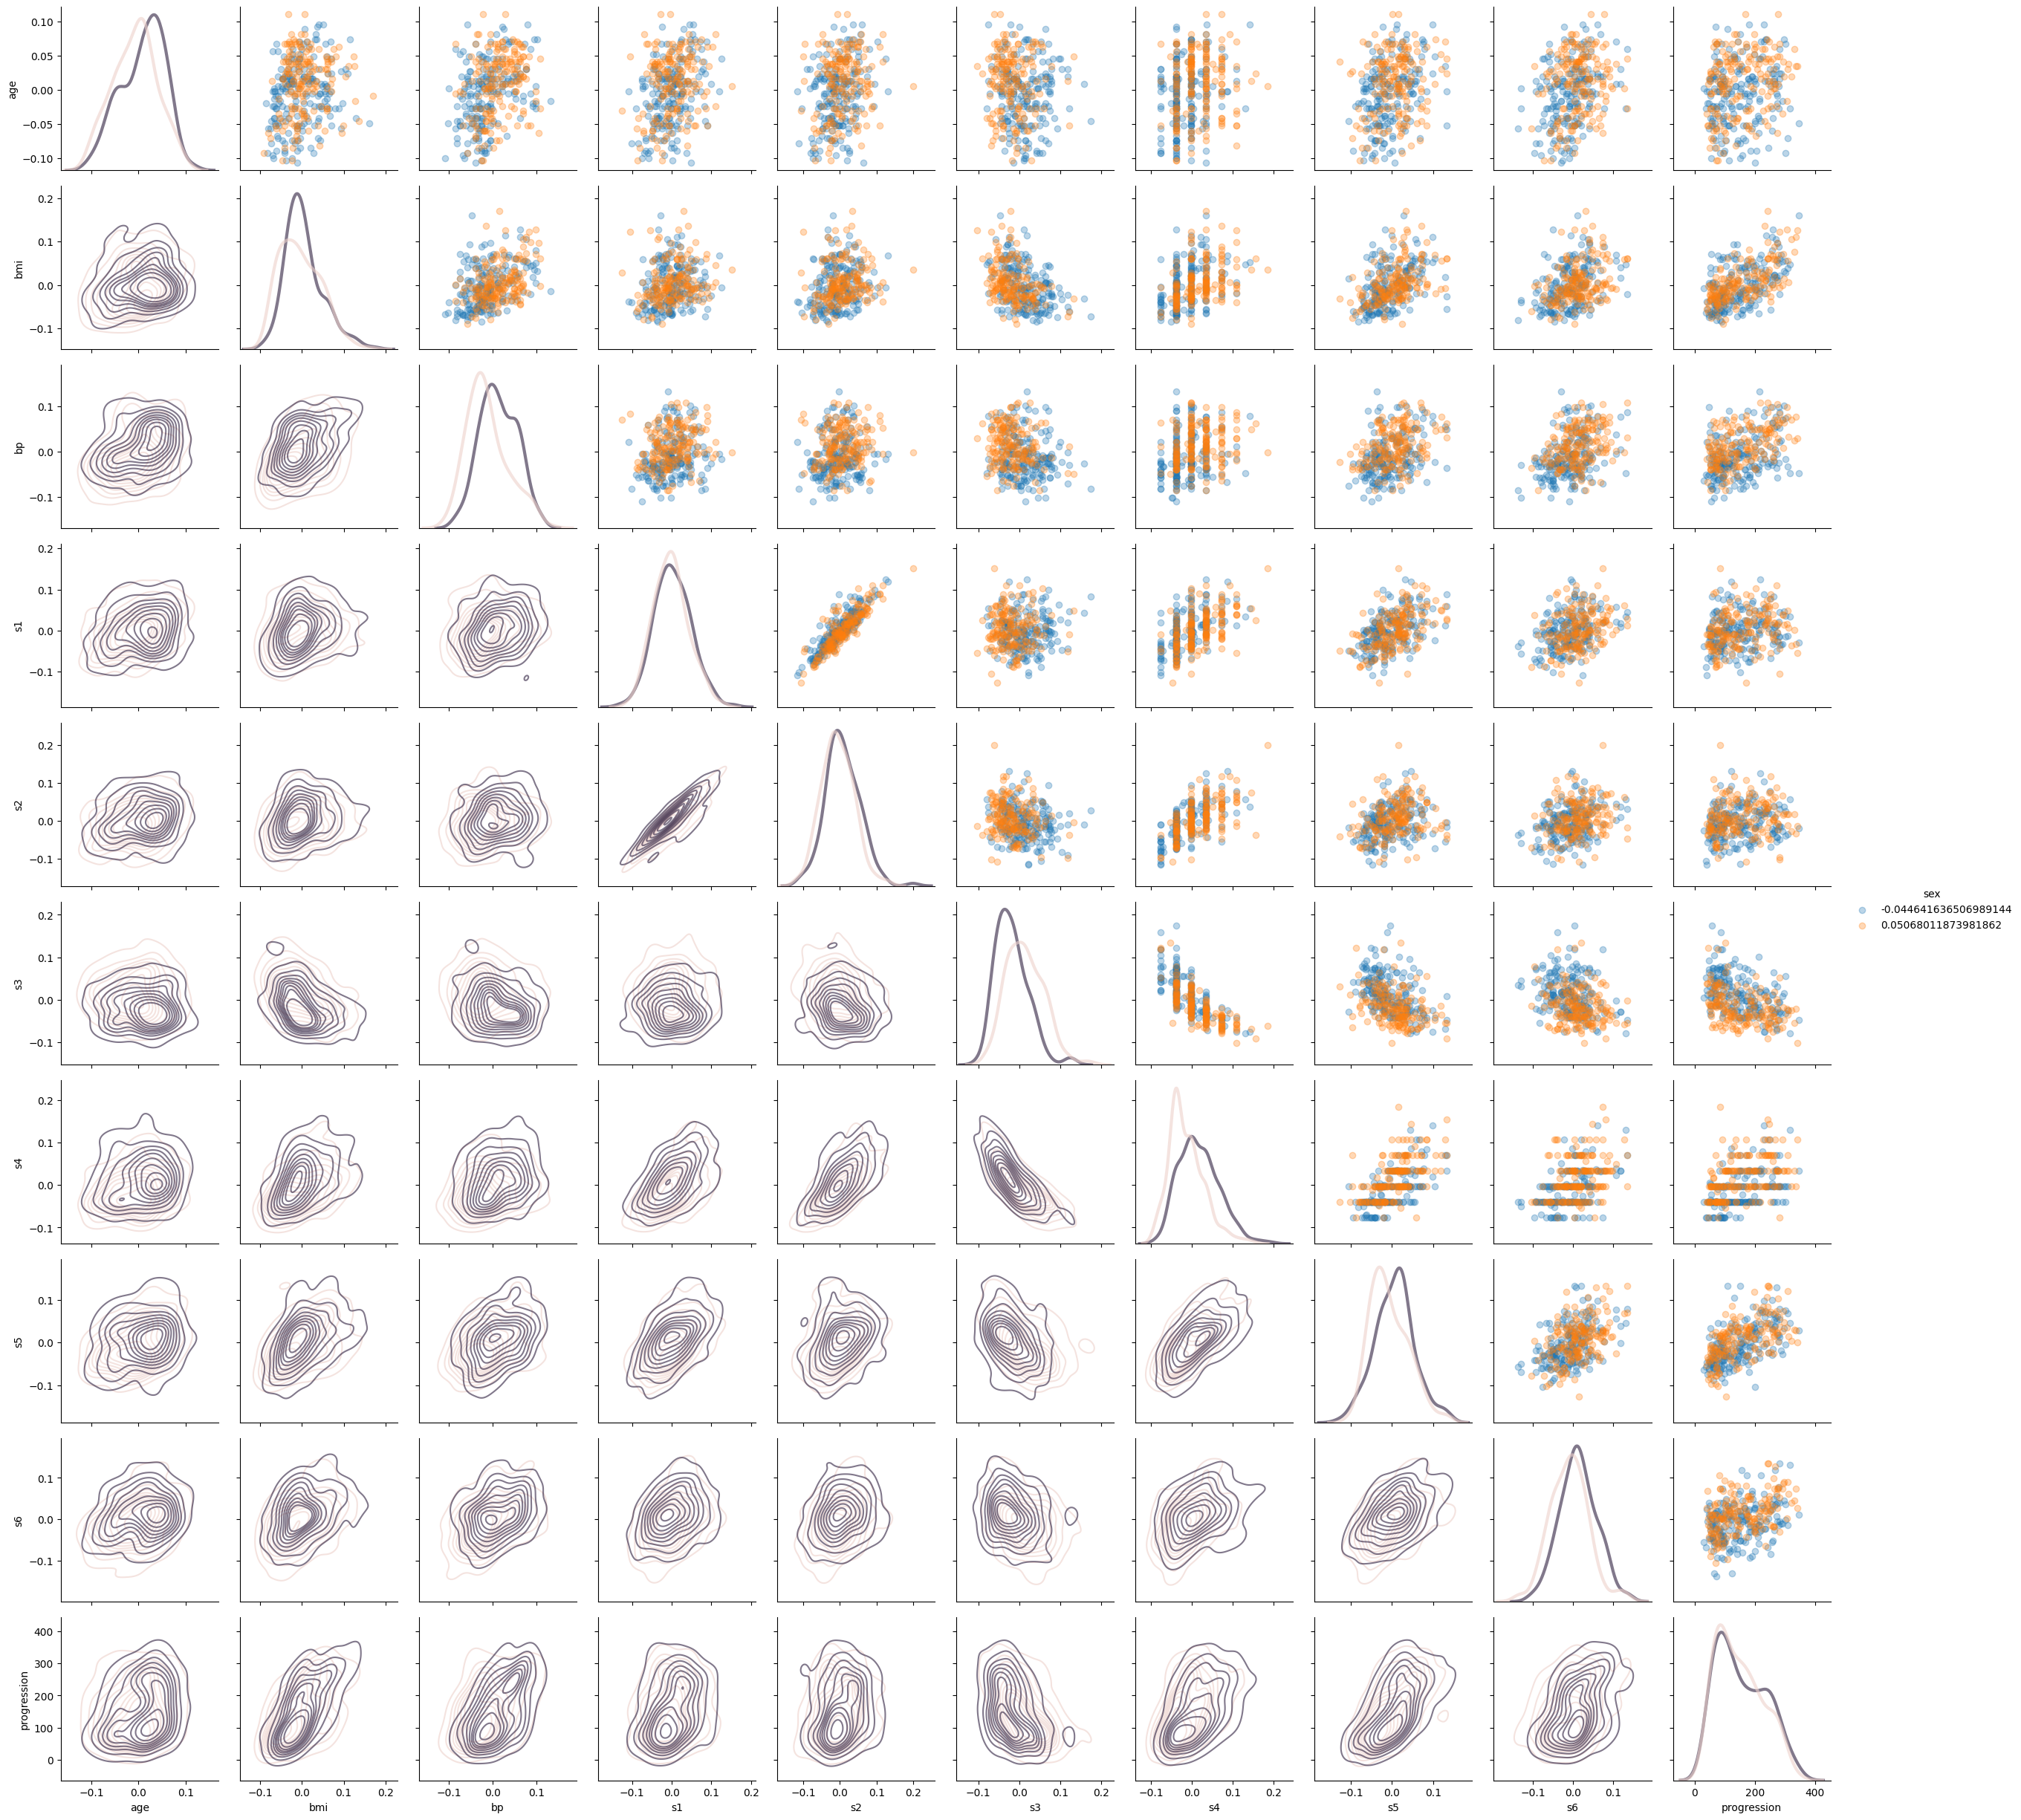

In [8]:
graph = sns.PairGrid(train, hue='sex', diag_sharey=False)
graph.map_lower(sns.kdeplot, alpha=0.6)
graph.map_upper(plt.scatter, alpha=0.3)
graph.map_diag(sns.kdeplot, lw=3, alpha=0.6, common_norm=False)
graph.add_legend()
plt.show()

По графику заметно, что:

1. Между s1 и s2 есть большая зависимость
2. Значение progression растёт с увеличением bmi, а также с bp, s5 и s6, но слабее

Как я понял формулировку задания, нужно выбрать из всех вещественных признаков тот, от которого признак progression больше всего зависит, и затем по этому признаку построить регрессионную прямую. Иначе же пришлось бы строить регрессионную прямую для каждого из признаков

Исходя из этого, я выбрал признак bmi

Создаём модель линейной регресии. Сначала сделаем это, используя встроенную в Scikit-Learn

In [9]:
X_train = train[['bmi']]
Y_train = train[target_feature]

model = LinearRegression(fit_intercept=True)
model.fit(X_train, Y_train)

print("Свободный коэффициент =", model.intercept_)
print("Коэффициент перед признаком =", model.coef_)

Свободный коэффициент = [151.88233006]
Коэффициент перед признаком = [[959.46797658]]


Теперь выполняем предсказание на test

In [10]:
X_test = test[['bmi']]
Y_pred = model.predict(X_test)

Рисуем график

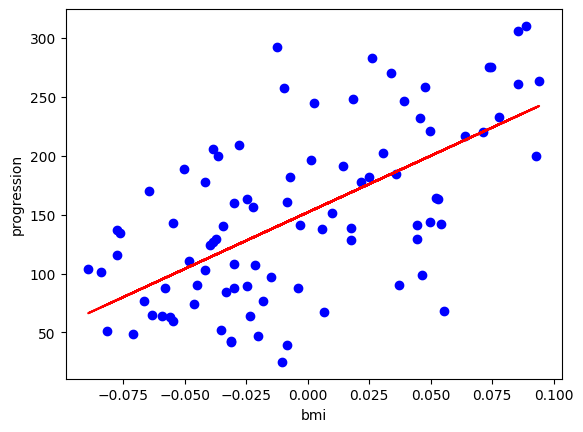

In [11]:
Y_test = test[target_feature]

plt.scatter(X_test, Y_test, color="b")
plt.plot(X_test, Y_pred, color="r")
plt.xlabel("bmi")
plt.ylabel("progression")
plt.show()

Теперь моя реализация

In [12]:
def coef(X_train, Y_train):  # нахождение коэффициентов регрессионной прямой
    sum_x, sum_y, sum_xy, sum_x2 = 0, 0, 0, 0
    
    x = [x for x in np.nditer(X_train)]
    y = [y for y in np.nditer(Y_train)]
    
    N = len(y)

    for i in range(N):
        sum_x += x[i]
        sum_y += y[i]
        sum_xy += x[i]*y[i]
        sum_x2 += x[i]**2

    b = (sum_xy - sum_x*sum_y/N)/(sum_x2 - sum_x**2/N)
    a = (sum_y - b*sum_x)/N

    return (a, b)


def f(x, a, b):
    return a + b*x

In [13]:
a, b = coef(X_train, Y_train)

print("Свободный коэффициент =", a)
print("Коэффициент перед признаком =", b)

Свободный коэффициент = 151.88233005638628
Коэффициент перед признаком = 959.4679765817907


График

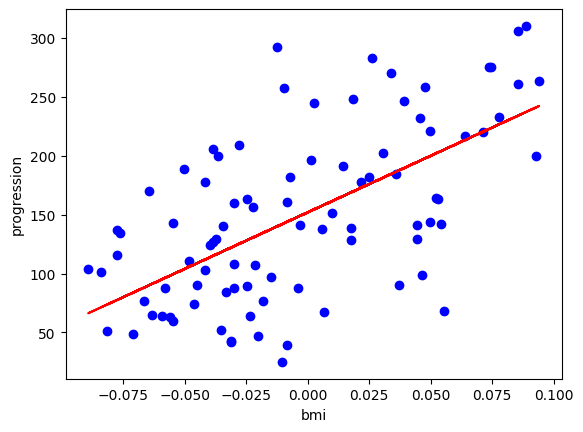

In [14]:
plt.scatter(X_test, Y_test, color="b")
plt.plot(X_test, f(X_test, a, b), color="r")
plt.xlabel("bmi")
plt.ylabel("progression")
plt.show()

Результаты предсказаний

In [15]:
print(Y_pred)

[[114.90413071]
 [ 73.53908392]
 [220.38500001]
 [134.55252793]
 [184.19058408]
 [ 66.30020073]
 [196.60009811]
 [233.82864022]
 [169.7128177 ]
 [186.25883642]
 [149.03029431]
 [131.45014942]
 [165.57631302]
 [113.87000454]
 [123.17714007]
 [122.1430139 ]
 [ 88.0168503 ]
 [122.1430139 ]
 [199.70247662]
 [168.67869153]
 [ 77.6755886 ]
 [153.16679899]
 [143.85966346]
 [116.97238305]
 [194.53184577]
 [189.36121492]
 [187.29296259]
 [123.17714007]
 [123.17714007]
 [195.56597194]
 [194.53184577]
 [128.34777091]
 [ 98.35811199]
 [137.65490644]
 [158.33742983]
 [203.8389813 ]
 [ 78.70971477]
 [223.48737852]
 [233.82864022]
 [107.66524752]
 [ 71.47083158]
 [176.95170089]
 [105.59699518]
 [132.48427559]
 [142.82553729]
 [204.87310747]
 [242.10164958]
 [202.80485513]
 [125.24539241]
 [236.93101873]
 [154.20092516]
 [143.85966346]
 [114.90413071]
 [ 95.25573349]
 [ 99.39223816]
 [161.43980834]
 [157.30330367]
 [129.38189708]
 [144.89378963]
 [241.06752341]
 [141.79141112]
 [120.07476156]
 [ 99.39

Теперь посчитаем метрики

In [16]:
mae = metrics.mean_absolute_error(Y_test, Y_pred)
mape = metrics.mean_absolute_percentage_error(Y_test, Y_pred)
r2 = metrics.r2_score(Y_test, Y_pred)

print("MAE =", mae)
print("MAPE =", mape)
print("R2 =", r2)

MAE = 47.66044297722731
MAPE = 0.475722900026293
R2 = 0.3653941826618705
